# Ideas
  * let them calculate a synchronous phase and try it out
  * add damping term
  * exercise about bunch length for electrons with damping

In [1]:
%pylab notebook
from ipywidgets import interact
rcParams['axes.grid'] = True

Populating the interactive namespace from numpy and matplotlib


# Computer Lab: Longitudinal Motion
### USPAS 2020 Fundamentals of Accelerator Physics and Technology 
_Authors: E. Harms, N. Neveu (2019), M. Betz (2020)_

This worksheet demonstrates phase space motion in the longitudinal degree of freedom.   
Questions to be answered and turned in for grade are typeset in **Bold** Type.

## 1. Longitudinal Phase Space Motion

From the `Longitudinal Motion I` lecture we recall the equations for longitudinal motion.
For this simulation we simplify them a bit by neglecting the damping term and only considering deviations from the ideal particle:

$$\begin{aligned}
\Delta \dot{E} &= k_1 \left[\sin(\Psi_0 + \Delta \Psi) - \sin(\Psi_0)\right],\\
\Delta \dot{\Psi} &= k_2 \Delta E,
\end{aligned}$$

where $\Psi$ is the phase (= arrival time) with respect to the RF system, 
$\Psi_0$ is the constant synchronous phase and 
$\Delta E$ is the energy gain per turn.

The two constants are:

$$\begin{aligned}
k_1 &= \frac{q V_0}{T_0},\\
k_2 &= \frac{2 \pi h}{\beta^2 T_0 E} \eta.
\end{aligned}$$

They are explained in the python code below ...

By using the [Euler method](https://en.wikipedia.org/wiki/Euler_method), the two __differential equations__ can be converted into __difference equations__: 



$$\begin{align}
\Delta E_{n+1} &= \Delta E_n + k_1 \left[\sin(\Psi_0 + \Psi_{n + 1}) - \sin(\Psi_0)\right], \\
\Delta \Psi_{n+1} &= \Delta \Psi_n + k_2 \Delta E_n.
\end{align}$$


Each evaluation $n$ corresponds to the particles taking one turn in the circular machine.

The following cells allow the user to enter various initial conditions (i.e. various $\phi_0$, $\Delta E_0$) of particles and track their motion for a specified number of iterations.

In order to do the calculations in Python, the equations had to be written such that the indices of order n appear on the right-hand side, and indices of order n+1 appear on the left. You should verify that the difference equations here are equivalent to the ones derived in class.

In the worksheet program, the user can vary the parameters of the basic equations of motion to produce phase space plots in $\Delta E_0 -\phi$ coordinates.  
The default parameters are typical of Fermilab Main Injector operation at its injection energy.  
By inputting various initial conditions one can explore the phase space region under various parameter regimes.  
For example: The synchronous phase is initialized to 0. For this value locate the separatrix.

## Setup constants

In [2]:
q = 1  # charge of a proton [e]
V_0 = 200e3 # peak RF voltage in the cavity [V]
T_0 = 1 #  Revolution period of nominal particle [s] TODO needs to be 1, why?
k1 = q * V_0 / T_0
# Unit of k1: [eV / s] = power = change of energy over time
print('k1 =', k1, 'eV / s')  # TODO why Nicole got 1e-13 for k1 ???

h = 588  # harmonic number
E = 8e9  # energy of the synchronous particle [eV]
m_0 = 938.3e6  # proton rest-mass [eV / c**2]
gamma = E / m_0  # Lorentz factor
print('gamma =', gamma)

beta = sqrt(1 - 1 / gamma**2)  # fraction of the speed of light
print('beta =', beta)

# momentum compaction factor: change of path length / change of momentum
# TODO: where to get that number from?
alpha_c = 1e-3 

# slip factor, pos: trajectory dominates arrival time, neg: velocity dominates arrival time
eta = alpha_c - 1 / gamma**2
print('eta =', eta)

# k2 should be [1 / W] TODO verify
k2 = 2 * pi * h / (beta**2 * T_0 * E) * eta
print('k2 =', k2)

k1 = 200000.0 eV / s
gamma = 8.52605776404135
beta = 0.9930980023863455
eta = -0.012756357656250002
k2 = -5.973236057996531e-09


## Evaluate the difference equations for `N` turns and `P` particles

<IPython.core.display.Javascript object>


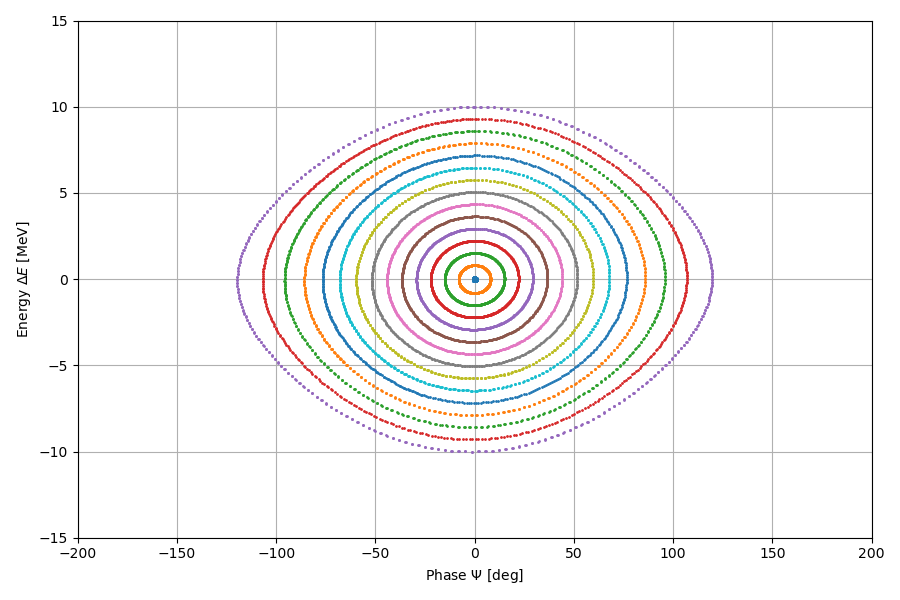

interactive(children=(FloatSlider(value=0.0, description='Psi_0_deg', max=90.0, min=-90.0, step=0.5), Output()…

In [18]:
N = 500  # number of turns the particles travel
P = 15  # Number of particles

# Setup (empty) plot with one line for each particle trajectory
# values to be updated later
close()
fig, ax = subplots(figsize=(9, 6))
ls = [ax.plot(zeros(N), zeros(N), 'o', markersize=1)[0] for p in range(P)]
ax.set_xlabel('Phase $\Psi$ [deg]')
ax.set_ylabel('Energy $\Delta E$ [MeV]')
ax.axis((-200, 200, -15, 15))
fig.tight_layout()

@interact(Psi_0_deg=(-90, 90, 0.5))
def update(Psi_0_deg=0):   
    Psi_0 = deg2rad(Psi_0_deg) # synchronous phase [rad]

    # Create two lists which will hold hold energy and phase values for each turn
    # dE_n[-1] returns the last element of the list
    dE_n = [] 
    Psi_n = []

    # Initial Energy of particles in [eV]
    dE_n.append(linspace(.1e6, 10e6, P))
    # dE_n.append(rand(P) * 20e6)

    # Initial Phase of particles [rad]
    Psi_n.append(zeros(P))
    # Psi_n.append((rand(P) - 0.5) * 2 * pi)

    # Calculate dE and Psi for each particle for N turns.
    for n in range(N):
        next_Psi = Psi_n[-1] + k2 * dE_n[-1]
        next_dE = dE_n[-1] + k1 * (sin(next_Psi + Psi_0) - sin(Psi_0))
        Psi_n.append(next_Psi)
        dE_n.append(next_dE)

    # Convert lists to 2D numpy arrays
    # indices: [turn index n, particle index p]
    dE_n = vstack(dE_n)
    Psi_n = vstack(Psi_n)
    
    # Update the plot
    for i, l in enumerate(ls):
        l.set_data(rad2deg(Psi_n[:, i]), dE_n[:, i] / 1e6)

# TODO work out exercises ...

**Q1) What value of $\Delta E$ will the Radiofrequency system support under these conditions?**


**Q2) What happens to the particles that find themselves outside of the separatrix – are they lost from the synchrotron?  

Hint: Look at the motion of a particle that is very near the separatrix.**


**Q3) How does the motion behave near the “unstable fixed points”?**

---

Change the synchronous phase, $\phi_s$, to $30^{\circ}$ (what happens in a synchrotron when this phase change occurs?).  
Under these conditions...

**Q4) What value (approximately) of $\Delta E$ will the Radiofrequency system support now?**


**Q5) What happens to the particles that find themselves outside of the separatrix – are they lost from the synchrotron?**


**Q6) How does the motion behave near the “unstable fixed points”?**



---

Next, leaving the other parameters as they are, change the energy of the particle, $E_s$, from 8 GeV to 150 GeV.  
Where is the stable phase space region located now?  

(note: the transition energy of the Main Injector is about 22; what happens at transition?)

**Q7) What maximum $\Delta E$ will the RF system support now?**

Hint - you will need to find the optimal initial phase (`phi_vals1`), increase the number of turns and change the scaling on the plot.

---
The user should feel free to play with the parameters of the program.  
Put in the parameters of you “favorite” accelerator and explore phase space.  
Be sure to play with changing the scales of the plot axes in order to see the results.

#### Optional: 
Since the difference equations are of a non-linear system, one can push the parameters until resonance islands, chaos, and other non-linear effects are found.  
Go back to the “stationary bucket” case ($\phi_s$ = 0): 
- Increase the voltage by a factor of 10 and look at the phase space; 
- another factor of 10; another; and so on. 
- Can you find other regions of stability in the phase space? 
- Is there a value of the voltage for which the entire phase space becomes unstable?

----

---
## 3. Injection to Acceleration

The section demonstrates the effects of non-adiabatic variation of system parameters. This program, tracks a single particle in longitudinal phase space, and varies the RF synchronous phase linearly from $\phi_s=0$ (injection value) to a final value $\phi_{sf}$ (equal to 30 ̊ in the worksheet) used for acceleration.

The “injection porch” length – the time particles spend at the injection energy – is input with the parameter Nporch. The time it takes to reach the final acceleration rate is Nparab. The program plots $\phi_s$ versus turn number. The phase space plot begins by plotting only the first 900 turns (controlled by Nf).

```python
#Defining variables
g_t3    = 21.8  # gamma_t: initial = 21.8
phi_sf3 = 30    # Synchronous phase: initial = 30
Nporch3 = 1000  # injection porch length: intial = 1000
Nparab3 = 1000  # time to reach final acceleration rate: inital = 1000
Nmax    = 2*Nporch3 + Nparab3  # Max number of turns
E_s3    = 8*GeV # synchronous energy: initial = 8*GeV
eta3    = 1/g_t3**2 - (0.938*GeV)**2 / E_s3**2
beta_s3 = np.sqrt(1 - ( (0.938*GeV) / E_s3 )**2 )  # Relativistic beta
k3      = (2*np.pi*h*eta3)/(beta_s3**2 * E_s3)     # coefficent (2pi h eta)/ E

# Making data arrays
phi_vals3 = np.zeros([Nmax+1])
dE_vals3  = np.zeros([Nmax+1])

# Initial conditions
voltage      = 1.6*MeV # voltage: initial = 1.6*MeV
phi_vals3[0] = 0       # phase of particle, initial = 0
dE_vals3[0]  = 0.5*MeV # Energy spread of particle, dE = 1 MeV

# Looping through Nmax turns
for n in range(0,Nmax): 
    if n < Nporch3: 
        phi_s3 = np.deg2rad(0)
    elif (n >= Nporch3) and (n<(Nparab3+Nporch3)):
        phi_s3 = np.deg2rad(phi_sf3*(n-Nporch3)/(Nparab3))
    else:
        phi_s3 = np.deg2rad(30)
 
    #Angles
    radians3 = phi_vals3[n]
    
    #dE_n+1 = dE_n + eV* ( sin(phi_n) - sin(phi_s) )
    dE_vals3[n+1]  = dE_vals3[n] + voltage*( np.sin(radians3) - np.sin(phi_s3) )
    
    #phi_n+1 = phi + k * dE_n + eV ( sin(phi_n) - sin(phi_s) )
    phi_vals3[n+1] = radians3 + k3* ( dE_vals3[n] + voltage* ( np.sin(radians3) - np.sin(phi_s3)) ) 

#Setting resolution and size of plots
matplotlib.rcParams['figure.dpi'] = 100
# Plotting the data
Nf       = 900 #Number of turns to plot: initial = 900
degrees3 = np.rad2deg(phi_vals3) #Deg
plt.plot(degrees3[:Nf],dE_vals3[:Nf]/MeV, '-', markersize=1)
plt.xlabel('Phase [deg]', size=14)
plt.ylabel('$\Delta$ Energy [MeV]', size=14)
plt.grid()
plt.show()
```

**Q11) What is the synchrotron period in this example?**

---
- Vary Nf from 900 to the final value of 3000 in steps of 300. 
- Note how the particle’s phase space trajectory follows the synchronous phase as it moves from 0 to 30 degrees. 
- Note also how the size of the particle’s phase space ellipse remains essentially constant along the way. Thus, its “longitudinal emittance” is preserved in the process. The phase changes slowly enough that the motion is said to remain adiabatic.
- Next, change the “ramp parabola” i.e. decrease the number of turns it takes to make the RF synchronous phase reach 30 ̊. 
- Notice how the final particle emittance increases as the rate of phase change increases. 
- The process becomes non-adiabatic and the emittance is not preserved. 
- In general, if the motion is to be adiabatic, then the system parameters must change much more slowly than the period of the motion.

**Q12) What is the approximate fewest number of turns one can make the phase change in and still preserve the initial emittance?**